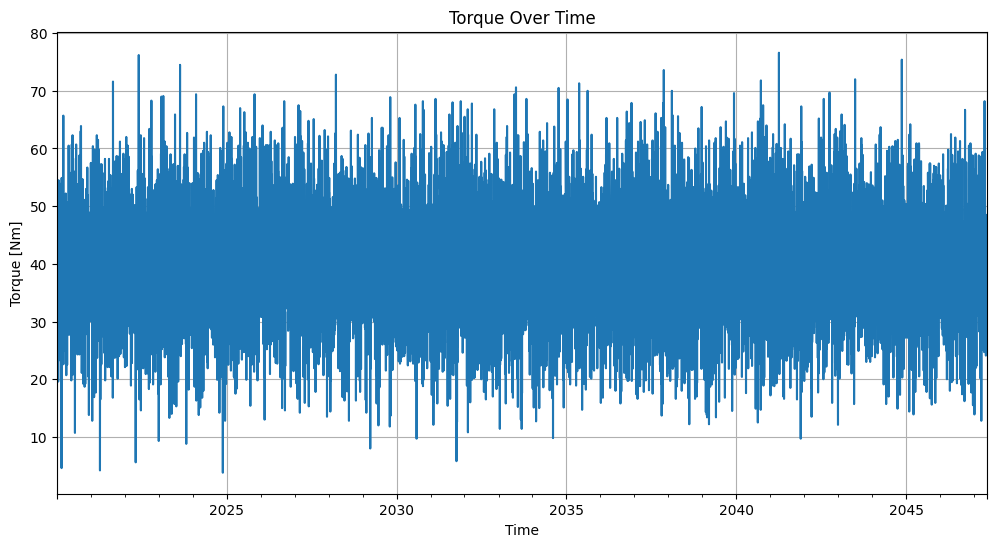

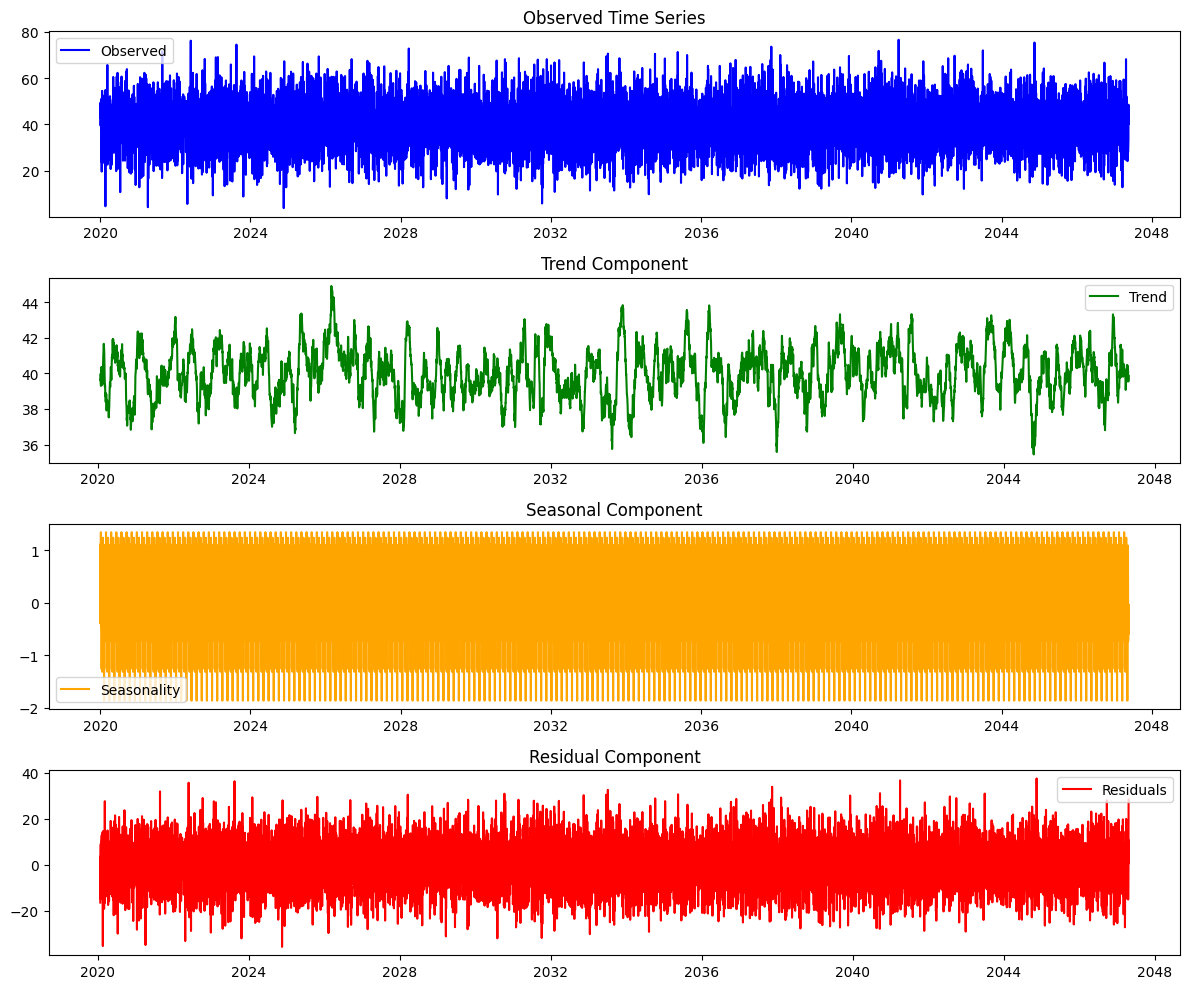

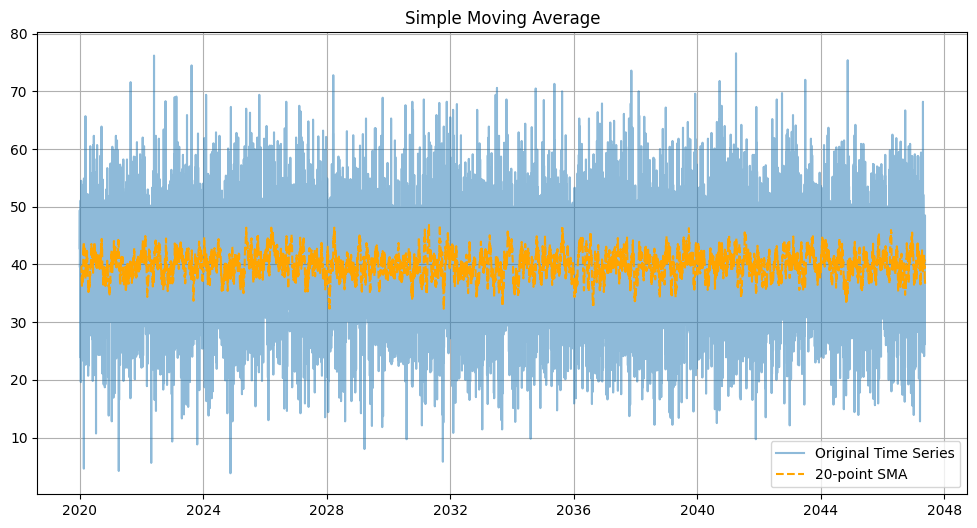

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-14-37afd222bade>:67: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  des_model = ExponentialSmoothing(time_series, trend='add', seasonal=None).fit(smoothing_level=0.8, smoothing_slope=0.2)


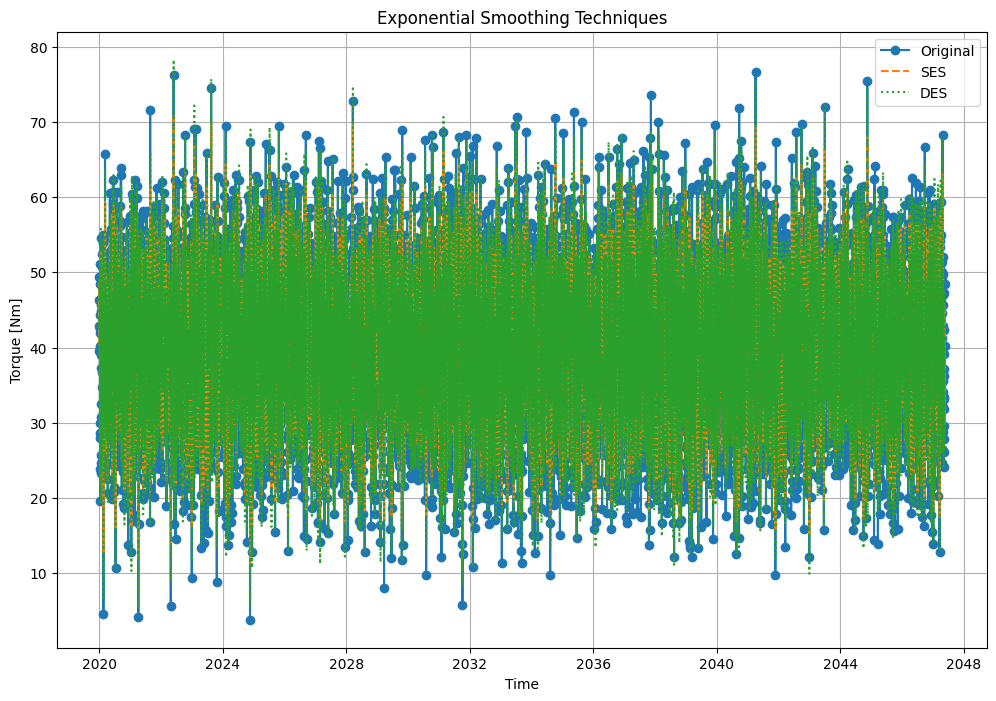

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


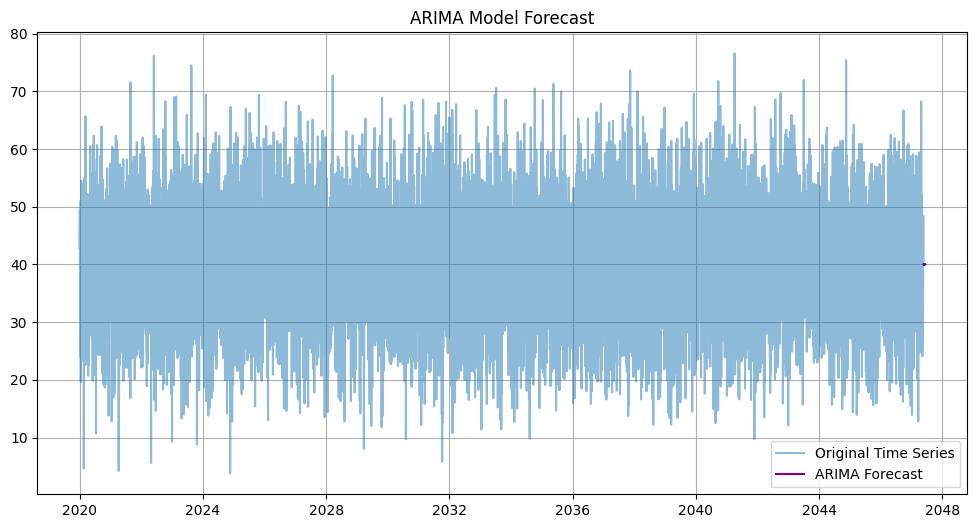

Mean Absolute Error (MAE): 7.974481792685298
Root Mean Squared Error (RMSE): 9.972610949090264


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = '/content/ai4i2020.csv'
data = pd.read_csv(file_path)

# Parse the UDI as the index for simulation of time-based data
data['UDI'] = pd.to_datetime(data['UDI'], unit='D', origin=pd.Timestamp('2020-01-01'))
data.set_index('UDI', inplace=True)

# Focus on the 'Torque [Nm]' column for analysis
time_series = data['Torque [Nm]']

# Step 1: Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot(title='Torque Over Time', ylabel='Torque [Nm]', xlabel='Time')
plt.grid()
plt.show()

# Step 2: Time Series Decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=50)  # Assume periodicity of 50

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Moving Averages
window_size = 20
sma = time_series.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', alpha=0.5)
plt.plot(sma, label=f'{window_size}-point SMA', color='orange', linestyle='--')
plt.title('Simple Moving Average')
plt.legend()
plt.grid()
plt.show()

# Step 4: Exponential Smoothing
ses_model = ExponentialSmoothing(time_series, trend=None, seasonal=None).fit(smoothing_level=0.8)
des_model = ExponentialSmoothing(time_series, trend='add', seasonal=None).fit(smoothing_level=0.8, smoothing_slope=0.2)

plt.figure(figsize=(12, 8))
plt.plot(time_series, label='Original', marker='o')
plt.plot(ses_model.fittedvalues, label='SES', linestyle='--')
plt.plot(des_model.fittedvalues, label='DES', linestyle=':')
plt.title('Exponential Smoothing Techniques')
plt.xlabel('Time')
plt.ylabel('Torque [Nm]')
plt.legend()
plt.grid()
plt.show()

# Step 5: ARIMA Model
arima_model = ARIMA(time_series, order=(2, 1, 2))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.predict(start=len(time_series), end=len(time_series) + 20, typ='levels')

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', alpha=0.5)
plt.plot(arima_forecast, label='ARIMA Forecast', color='purple')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.grid()
plt.show()

# Error Metrics
fitted_values_aligned = arima_fit.fittedvalues.iloc[1:]  # Adjust to align with the time series
time_series_aligned = time_series.iloc[1:len(fitted_values_aligned) + 1]

# Error Metrics
mae = mean_absolute_error(time_series_aligned, fitted_values_aligned)
rmse = np.sqrt(mean_squared_error(time_series_aligned, fitted_values_aligned))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
